# Abidam Car Dealing Inc. Car Price Prediction Project, 2020

### This project aims at predicting the selling price of some car models in the company. To achieve this, the car model, mileage and age (in years) of the car in question was used to predict the selling price of the car. A model was built using the machine learning tools, which was trained and then used for the prediction.

Content:
1. Data Preprocessing
2. Visualization using pair plot
3. Machine learning for building model and prediction
4. Conclusion

In [2]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sn

In [13]:
#import dataset
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [15]:
# change Mercedez Benz C to MBC class
df.loc[df['Car Model']=='Mercedez Benz C class', 'Car Model'] = 'MBC class'
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,MBC class,67000,22000,6


Visualization using pair plot

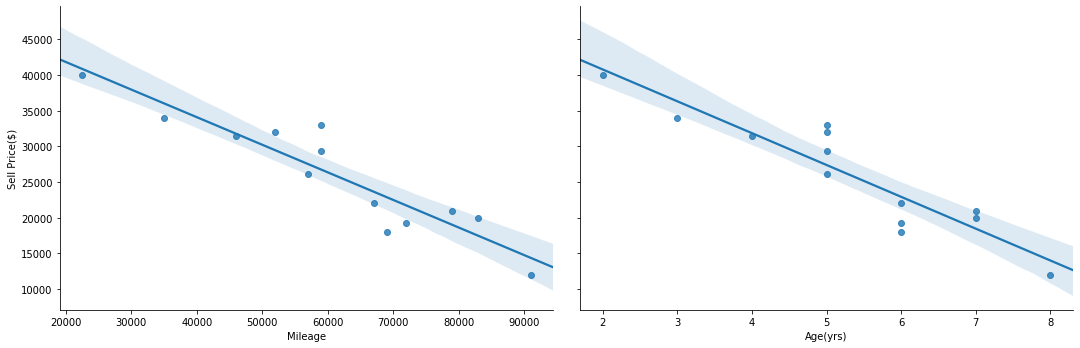

In [26]:
#check the relationship between mileage and age of the car model to see which has the impact on selling price most
sn.pairplot(df, x_vars=['Mileage','Age(yrs)'], y_vars='Sell Price($)', height=5, aspect=1.5, kind='reg')

#### Both Milleage and Age determines the selling price of the car as they are positively proportional to the selling price

Machine Learning for Modelling and Predictions

In [35]:
#Variables
#Selling Price is taken a the dependent variable
#Mileage and Age(yrs) are taken as the independent variable
#We can only work with numbers in sklearn library so we change the car models to dummy variables

df_dummy = pd.get_dummies(df['Car Model'])
df_dummy

,Audi A5,BMW X5,MBC class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [38]:
#concatenate both df and df_dummy
df_new = pd.concat([df,df_dummy], axis='columns')
df_new

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,MBC class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,MBC class,67000,22000,6,0,0,1


In [40]:
#save the new file
df_new.to_csv('newcarprice.csv', index=False)

In [45]:
#drop the Car model
df_new = df_new.drop('Car Model',axis='columns')
df_new

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,MBC class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [46]:
#import libraries for modelling
from sklearn.model_selection import train_test_split

In [49]:
X = df_new[['Mileage','Age(yrs)','Audi A5','BMW X5','MBC class']]
y = df_new['Sell Price($)']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9, 5), (4, 5), (9,), (4,))

In [50]:
#import linear regression and train the model
from sklearn.linear_model import LinearRegression

In [52]:
#make an object of linear regression class
lin_model = LinearRegression() 

#train the model
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Make Predictions

1. The price of MBC class that is 4 year old with mileage 45000

In [54]:
y_pred = lin_model.predict([[45000,4,0,0,1]])
y_pred

array([35484.44867537])

Predicted Price is $35,484 (to the nearest whole number)

2. The price of BMW X5 that is 7 year old with mileage of 86000

In [59]:
y_pred = lin_model.predict([[86000,7,0,1,0]])
y_pred

array([14234.27787465])

Predicted Price is $14234.27

In [64]:
#test the accuracy of the model
lin_model.score(X_train,y_train)

0.9492124152613944

In [66]:
#retrieve the intercept and the coefficientsrespectively
lin_model.intercept_ , lin_model.coef_

(54236.67282578867,
 array([ 1.64406115e-01, -7.29583917e+03,  3.75893674e+01, -3.07044670e+03,
         3.03285733e+03]))

Conclusion

Model's accuracy shows that predictions are reliable other things being equal.